### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

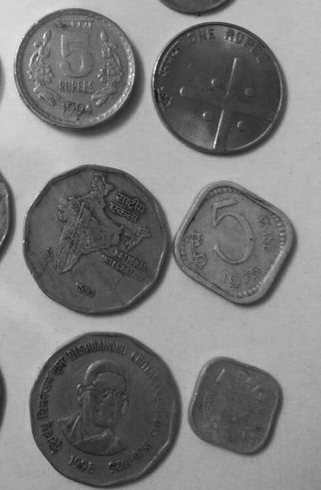

In [2]:
coins = cv2.imread('../dane/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

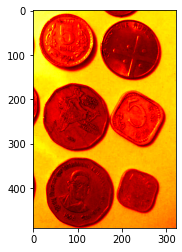

In [3]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

In [3]:
sobelx = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
G = np.sqrt((sobelx**2) + (sobely**2))

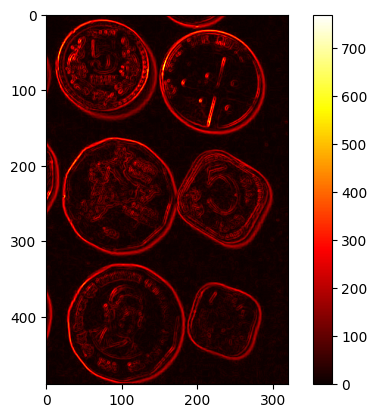

In [24]:
im = plt.imshow(G, cmap='hot')
plt.colorbar(im)

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

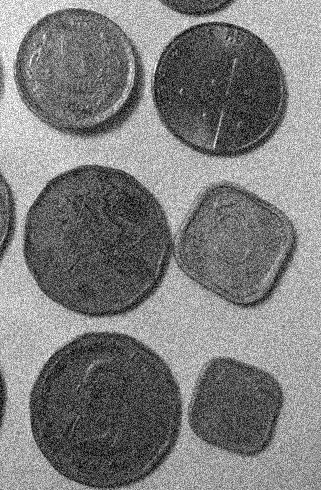

In [6]:
coins_noise = cv2.imread('../dane/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

Bez redukcji szumu:

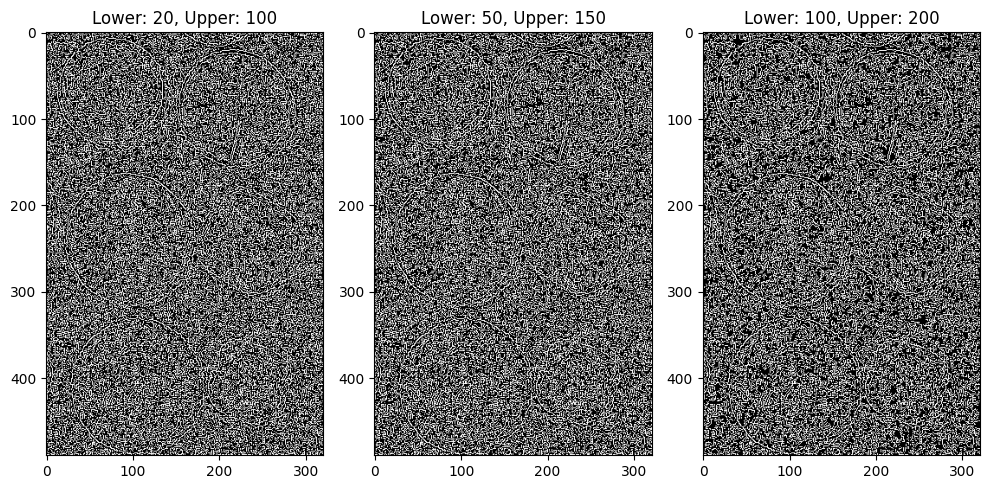

In [13]:
upper_theres = [100, 150, 200]
lower_thres = [20, 50, 100]
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
        plt.subplot(1,3, i+1)
        edges = cv2.Canny(image=coins_noise, threshold1=t[0], threshold2 = t[1])
        plt.imshow(edges, cmap='gray')
        plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()


Gaussian blur:

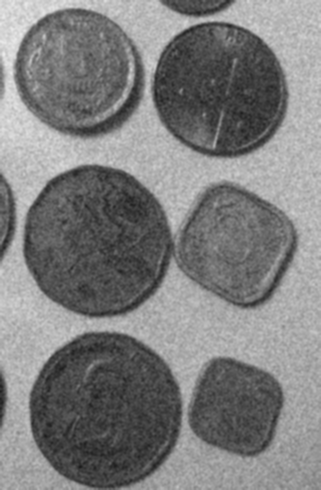

In [10]:
gauss_5 = cv2.GaussianBlur(coins_noise,(5,5),0)
Image.fromarray(gauss_5)

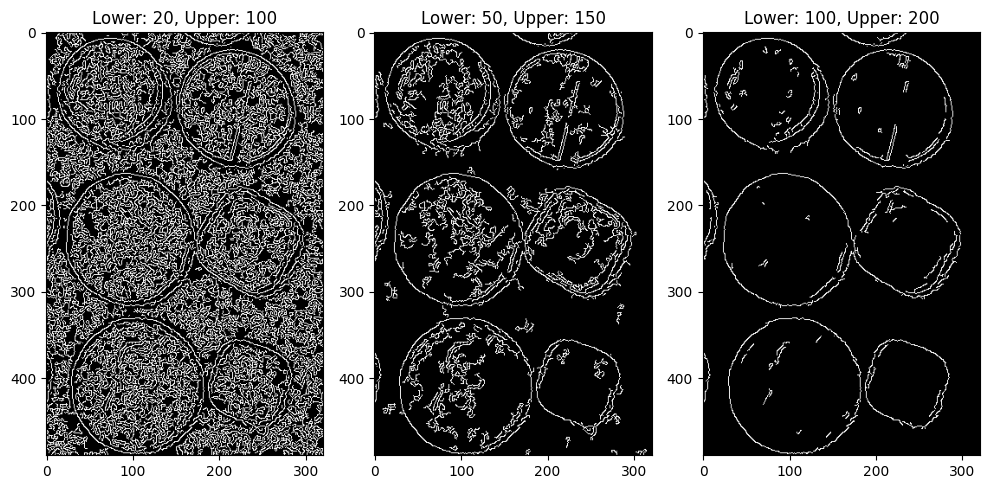

In [14]:
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
    plt.subplot(1,3, i+1)
    edges = cv2.Canny(image=gauss_5, threshold1=t[0], threshold2 = t[1])
    plt.imshow(edges, cmap='gray')
    plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()

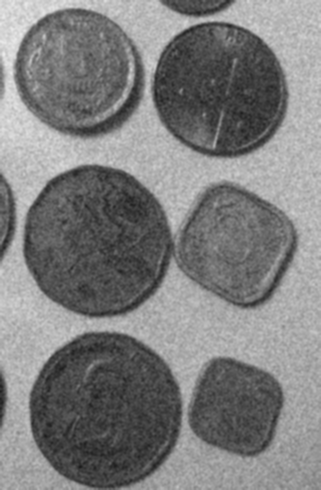

In [15]:
gauss_9 = cv2.GaussianBlur(coins_noise,(9,9),0)
Image.fromarray(gauss_5)

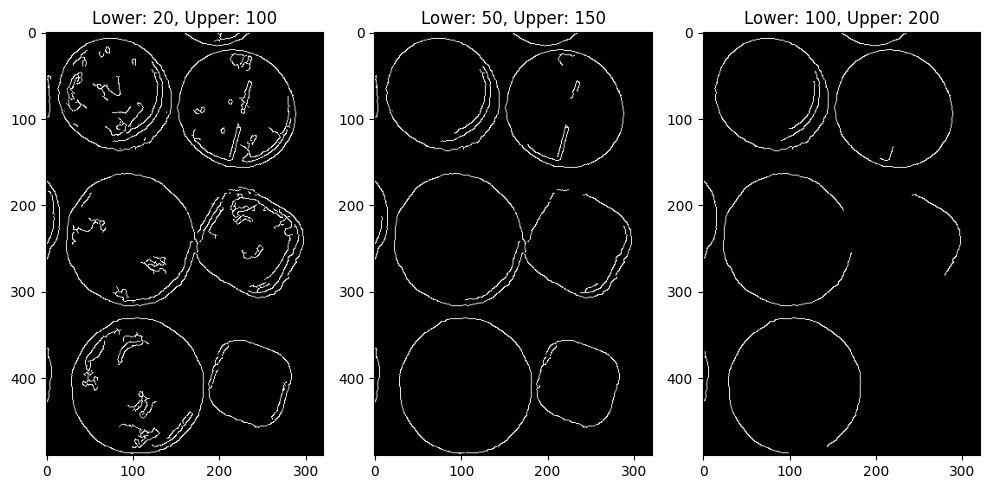

In [16]:
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
    plt.subplot(1,3, i+1)
    edges = cv2.Canny(image=gauss_9, threshold1=t[0], threshold2 = t[1])
    plt.imshow(edges, cmap='gray')
    plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()

Filtr uśredniający:

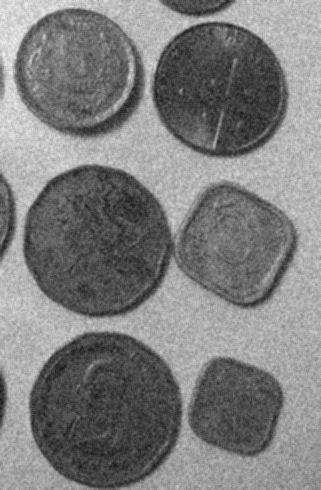

In [17]:
kernel_blur = np.ones((3, 3), np.float32) / 9
mean_img = cv2.filter2D(src=coins_noise, ddepth=-1, kernel=kernel_blur)

Image.fromarray(mean_img)

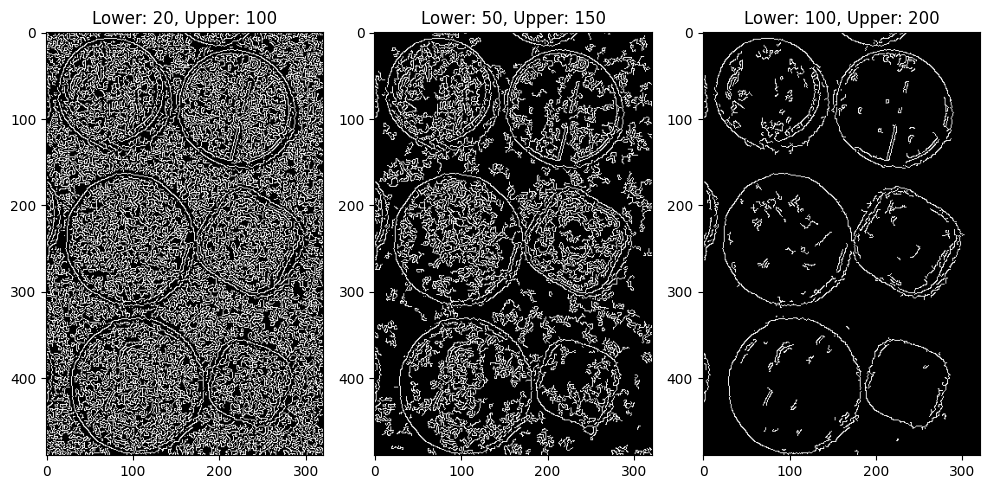

In [18]:
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
    plt.subplot(1,3, i+1)
    edges = cv2.Canny(image=mean_img, threshold1=t[0], threshold2 = t[1])
    plt.imshow(edges, cmap='gray')
    plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

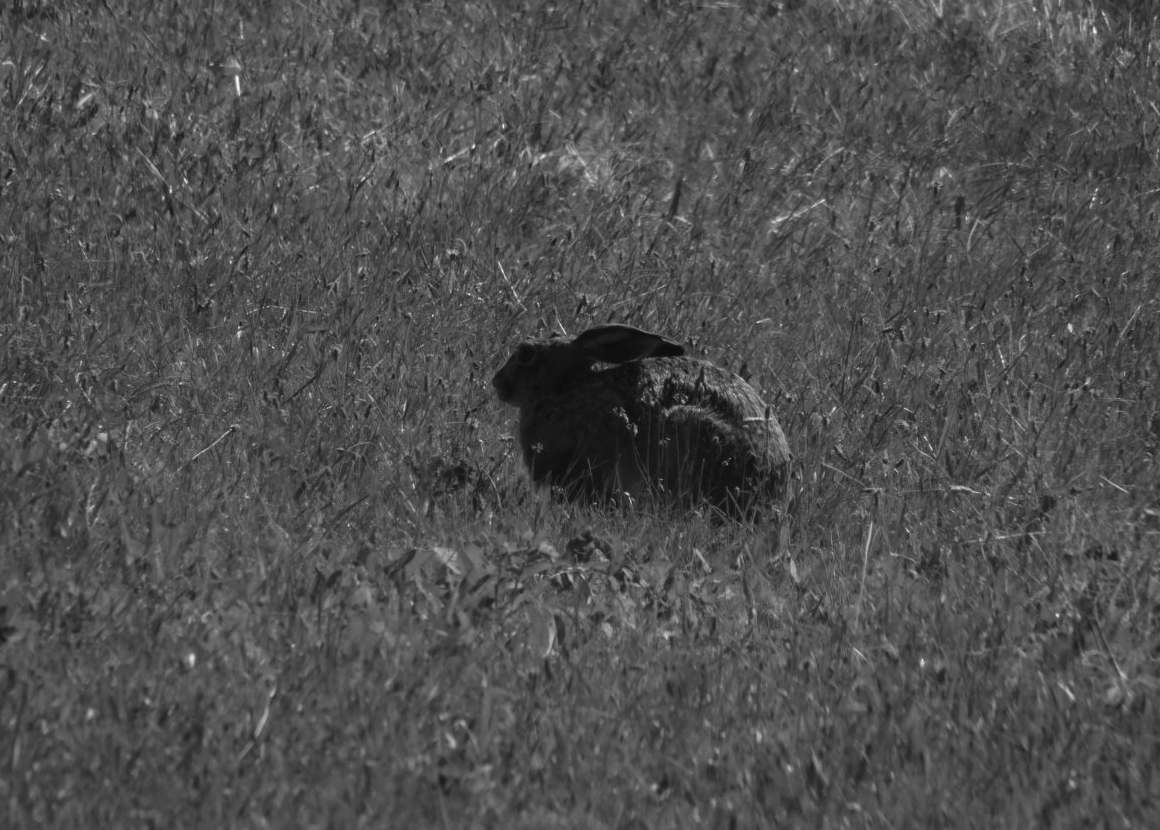

In [5]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie: